# Сравнение поисковых деревьев
### Выполнили Вихрев И., Репин В. гр 382006-3м

In [8]:
import sys
from pathlib import Path
import random
import time
import statistics as stat
sys.path.append(str(Path.cwd().resolve()/'python_bindings'))
import trees

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style = 'whitegrid', rc={'figure.figsize':(20, 10)})

In [10]:
dir(trees)

['AVLTreeInt',
 'AVLTreeString',
 'RBTreeInt',
 'RBTreeString',
 'SortedArrInt',
 'SortedArrString',
 'SplayTreeInt',
 'SplayTreeString',
 'TreapInt',
 'TreapString',
 '__builtins__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__test__']

In [74]:
def evaluate(tree, unique_set, count_rot = False):
    total = 0
    insert_time = []
    search_time = []
    delete_time = []
    rotations_count = []
    
    shuffled_set = random.sample(unique_set, len(unique_set))
    # insertion and searching time
    start_total = time.time()
    for idx, n in enumerate(unique_set):
        insert_mean = 0
        delete_mean = 0
        search_mean = 0
        tree.insert(n)
        if (idx == 0): continue
        for i in range(10):
            el = random.randrange(idx)
            delete_mean += tree.delete(unique_set[el])/10
            insert_mean += tree.insert(unique_set[el])/10
            search_mean += tree.search(unique_set[random.randrange(idx+1)])/10
        insert_time.append(insert_mean)
        delete_time.append(delete_mean)
        search_time.append(search_mean)     
        
        if(count_rot):
            rotations_count.append(tree.rotations_num)
        
    end_total = time.time()
    total = end_total - start_total
    insert_mean = stat.mean(insert_time)
    std_insert = stat.stdev(insert_time)
    search_mean = stat.mean(search_time)
    std_search = stat.stdev(search_time)
    delete_mean = stat.mean(delete_time)
    std_delete = stat.stdev(delete_time)
    print(f'Insert, Mean : {stat.mean(insert_time)*10**(3):.6f} ms.,  Max {max(insert_time)*10**(3):.6f} ms.')
    print(f'Search, Mean : {stat.mean(search_time)*10**(3):.6f} ms.,  Max {max(search_time)*10**(3):.6f} ms.')
    print(f'Delete, Mean : {stat.mean(delete_time)*10**(3):.6f} ms.,  Max {max(delete_time)*10**(3):.6f} ms.')
    insert_time = [x if x < insert_mean + 3*std_insert else insert_mean for x in insert_time]
    search_time = [x if x < search_mean + 3*std_search else search_mean for x in search_time]
    delete_time = [x if x < delete_mean + 3*std_delete else delete_mean for x in delete_time]
    print(f'Total time {(total):.6f}, sec')
    return (insert_time, search_time, delete_time, rotations_count)

In [75]:
unique_num_set = random.sample(range(0, 10**6), 10**6)
num = range(0, len(unique_num_set))
x = [i*10**4 for i in range(100)]
x[-1] += -1

### Методика: 
Замер времени вставки, поиска и удаления элемента проводился 10 раз для каждого количества элементов дерева. В результат бралось среднее значение 10 измерений для каждой операции на каждой итерации цикла. График зависимости строим по данным для каждого 100000 элемента. Выборка обрабатывается по правилу трех сигм

# splay tree

Двоичное дерево поиска, в котором поддерживается свойство сбалансированности. Особенностью является то, что при каждом обращении к дереву вызывается функция splay(x) - перемещение элемента x к корню дерева. Амортизированное время выполнения основных операций(вставка, поиск, удаление) - O(log(n))

In [87]:
insert_time, search_time, delete_time, _ = evaluate(trees.SplayTreeInt(), unique_num_set)

Insert, Mean : 0.000399 ms.,  Max 0.502780 ms.
Search, Mean : 0.001801 ms.,  Max 0.613280 ms.
Delete, Mean : 0.002223 ms.,  Max 2.612620 ms.
Total time 79.205825, sec


### Insertion

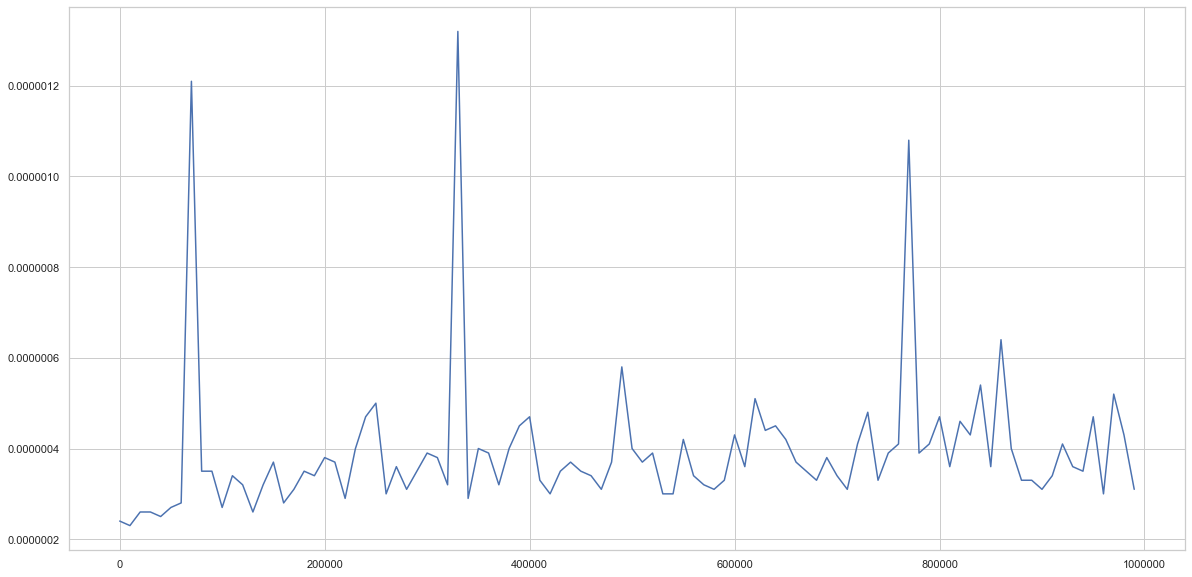

In [88]:
y = [insert_time[el] for el in x]
plt.plot(x, y)  
pass

In [89]:
import scipy as scp
import numpy as np
x_new = np.linspace(1, 10**6, 1000)
spline = scp.interpolate.make_interp_spline(x, y)
new_y = spline(x_new)

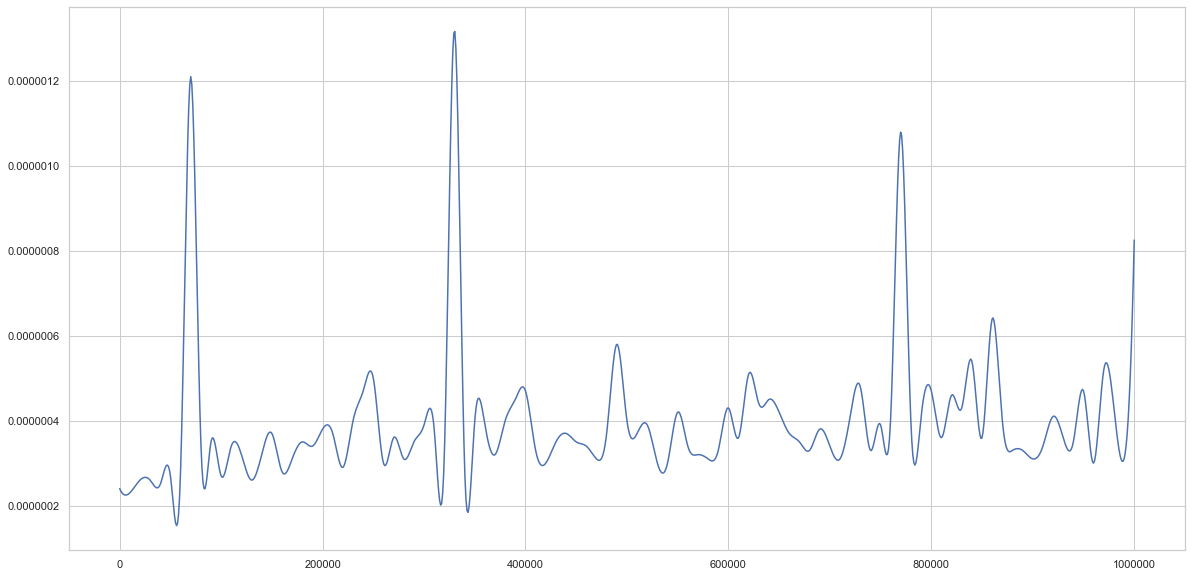

In [90]:
plt.plot(x_new, new_y)  
pass

In [91]:
# x = [i*10**5 for i in range(10)]
# x[-1] += -6
# y = []       
# for el in x:
#     avg = 0
#     for i in range(-5,5,1):
#         avg += insert_time[el+i]/10
#     y.append(avg)
# plt.plot(x, y)  
# pass

### Searching

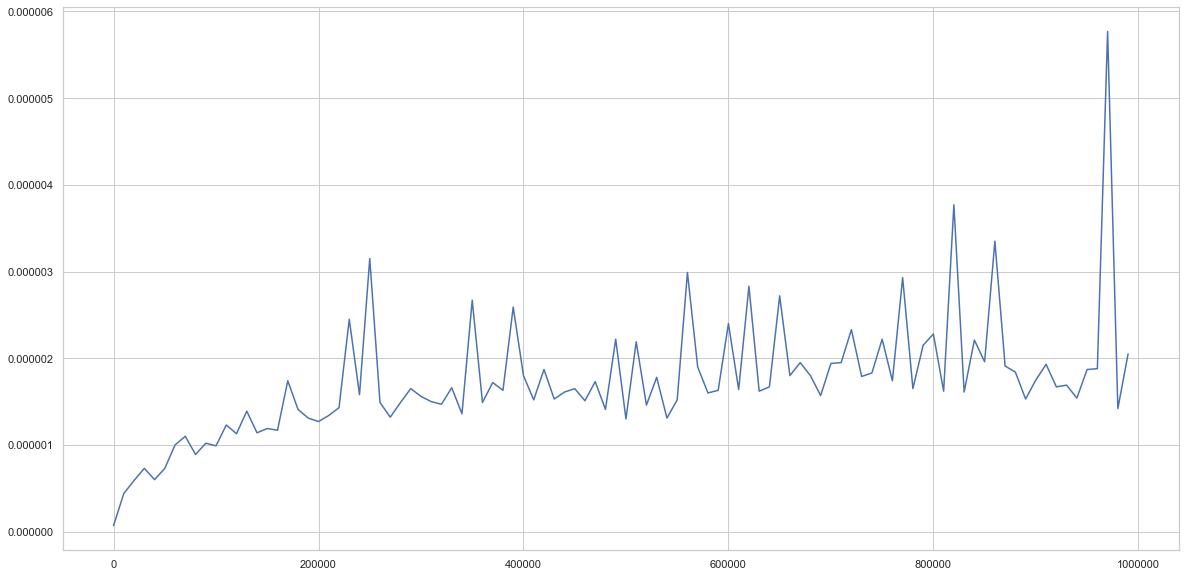

In [92]:
y = [search_time[el] for el in x]
plt.plot(x, y)
pass

### Deletion

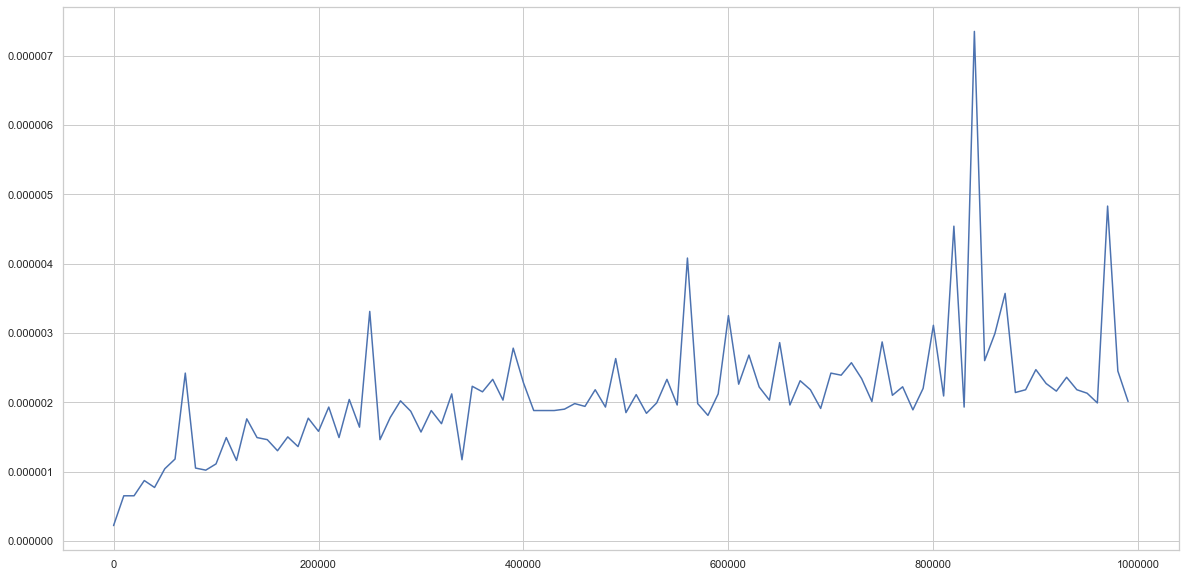

In [93]:
y = [delete_time[el] for el in x]
plt.plot(x, y)
pass

# AVL tree

Сбалансированное двоичное дерево поиска, в котором поддерживается следующее свойство: для каждой его вершины высота её двух поддеревьев различается не более чем на 1. Среднее время выполнения основных операций O(log(n))

In [76]:
insert_time, search_time, delete_time, rotations_count = evaluate(trees.AVLTreeInt(), unique_num_set, True)

Insert, Mean : 0.000665 ms.,  Max 0.415280 ms.
Search, Mean : 0.000960 ms.,  Max 0.617690 ms.
Delete, Mean : 0.001987 ms.,  Max 1.493230 ms.
Total time 70.439919, sec


### Rotations

Количество поворотов при вставке:

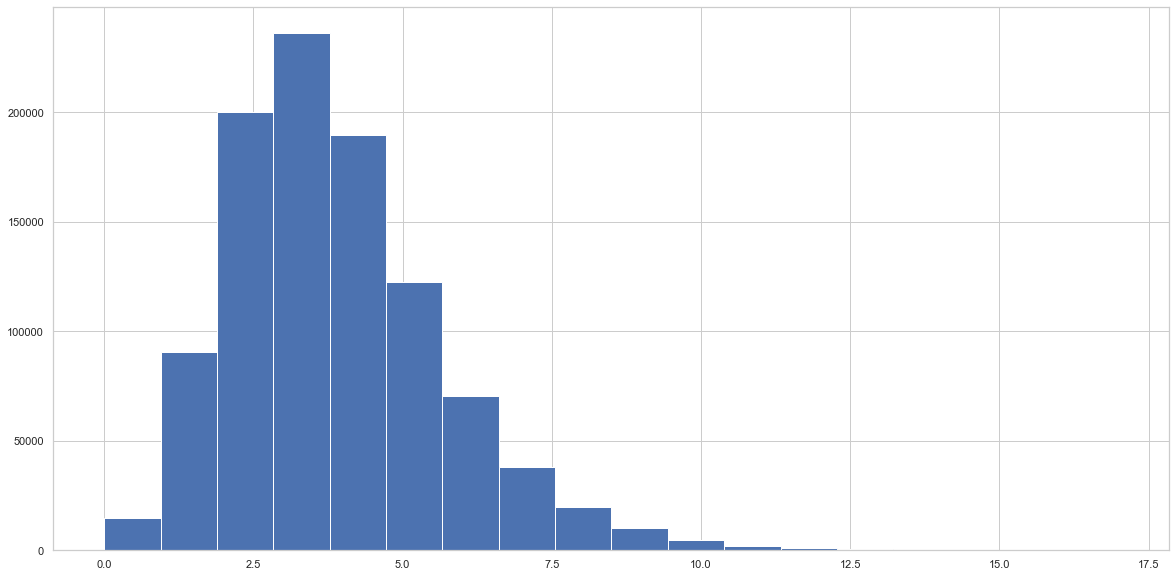

In [82]:
plt.hist(rotations_count, bins = len(set(rotations_count)) )
pass

In [83]:
max(rotations_count)

17

### Insertion

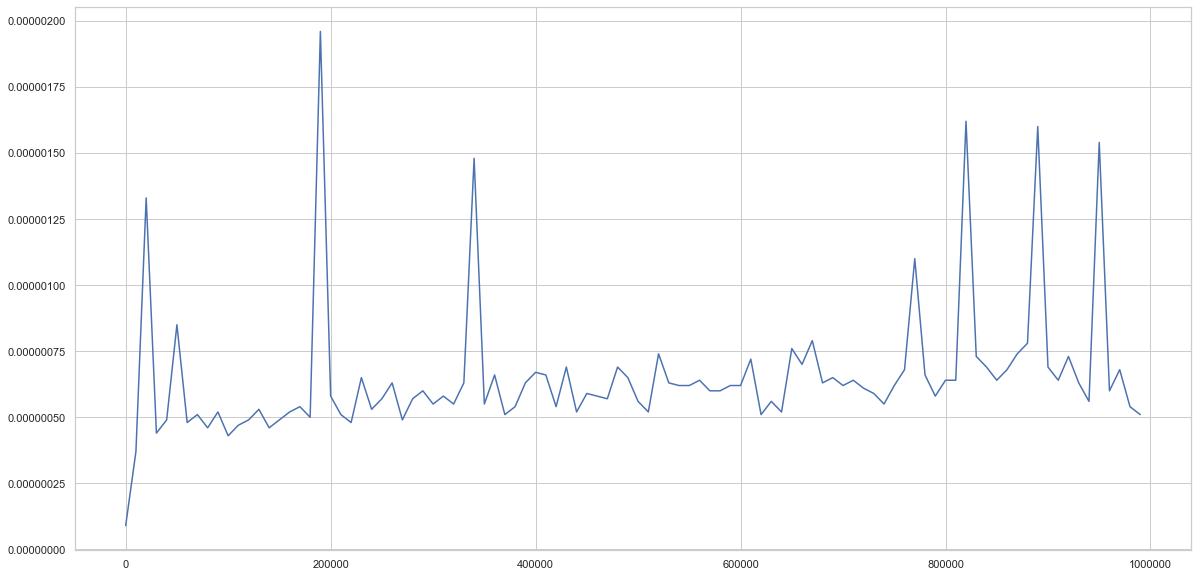

In [84]:
y = [insert_time[el] for el in x]
plt.plot(x, y)
pass

### Searching

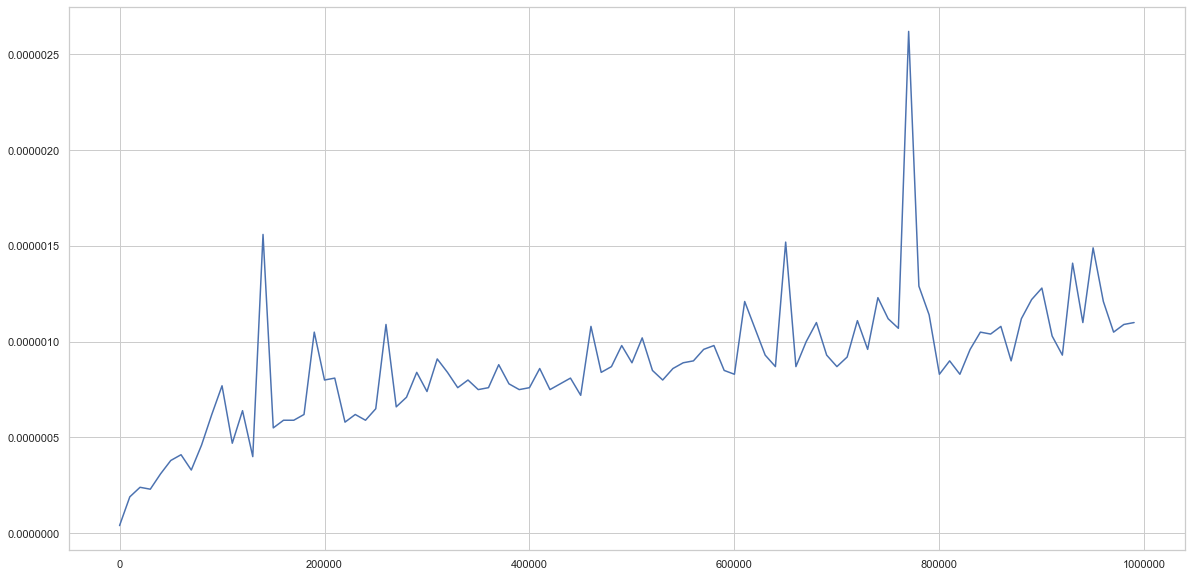

In [85]:
y = [search_time[el] for el in x]
plt.plot(x, y)
pass

### Deletion

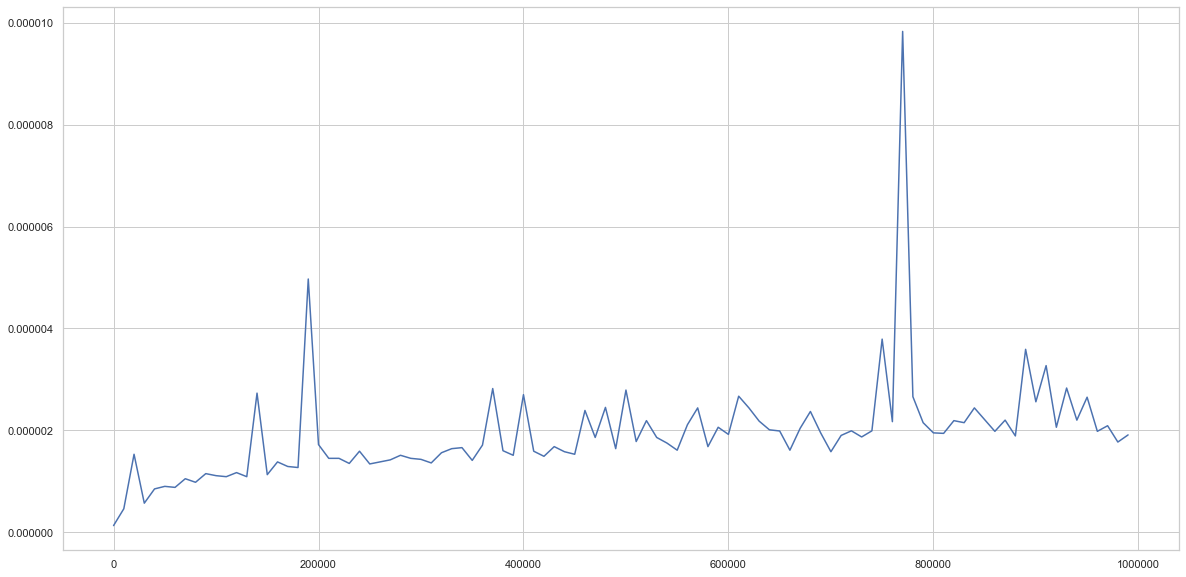

In [86]:
y = [delete_time[el] for el in x]
plt.plot(x, y)
pass

# Treap

In [94]:
insert_time, search_time, delete_time, _ = evaluate(trees.TreapInt(), unique_num_set)

Insert, Mean : 0.019829 ms.,  Max 1.939590 ms.
Search, Mean : 0.013542 ms.,  Max 3.394410 ms.
Delete, Mean : 0.024750 ms.,  Max 2.494680 ms.
Total time 660.441278, sec


### Insertion

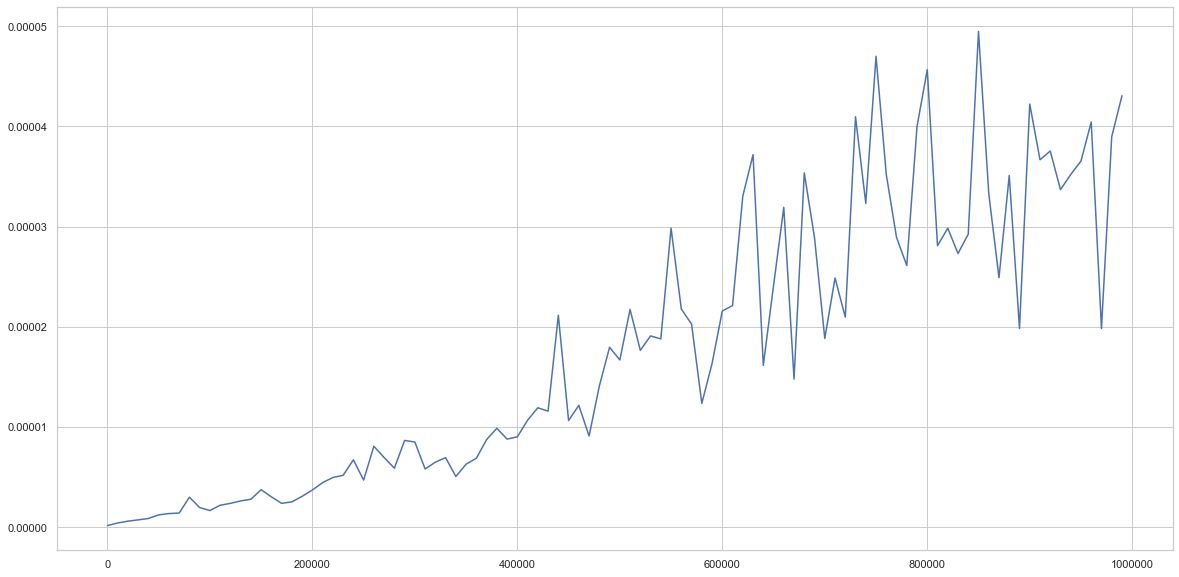

In [95]:
y = [insert_time[el] for el in x]
plt.plot(x, y)
pass

### Searching

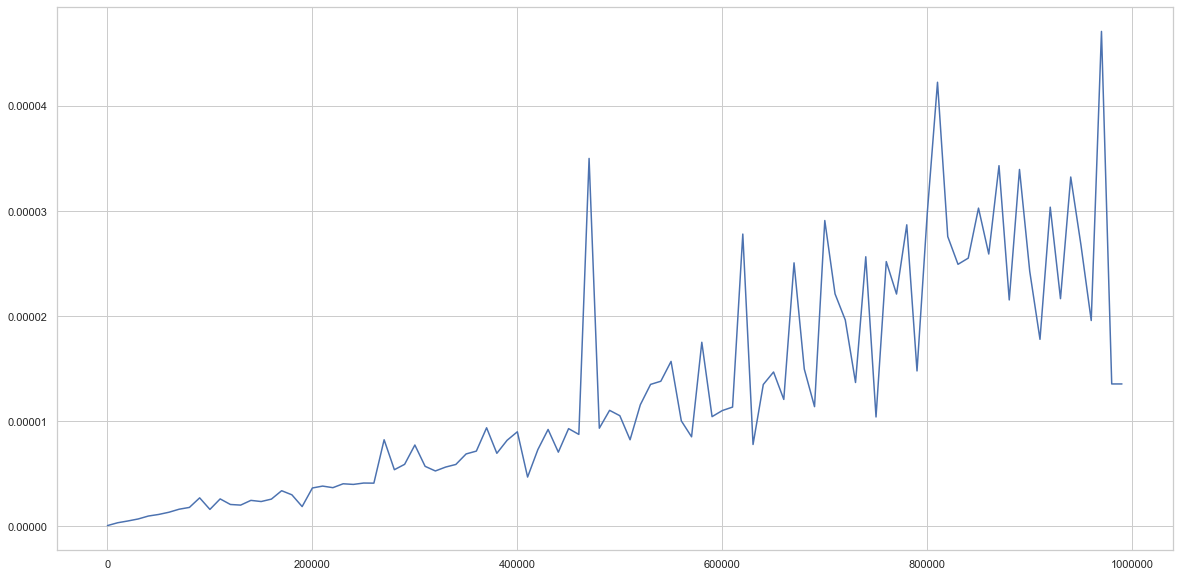

In [96]:
y = [search_time[el] for el in x]
plt.plot(x, y)
pass

### Deletion

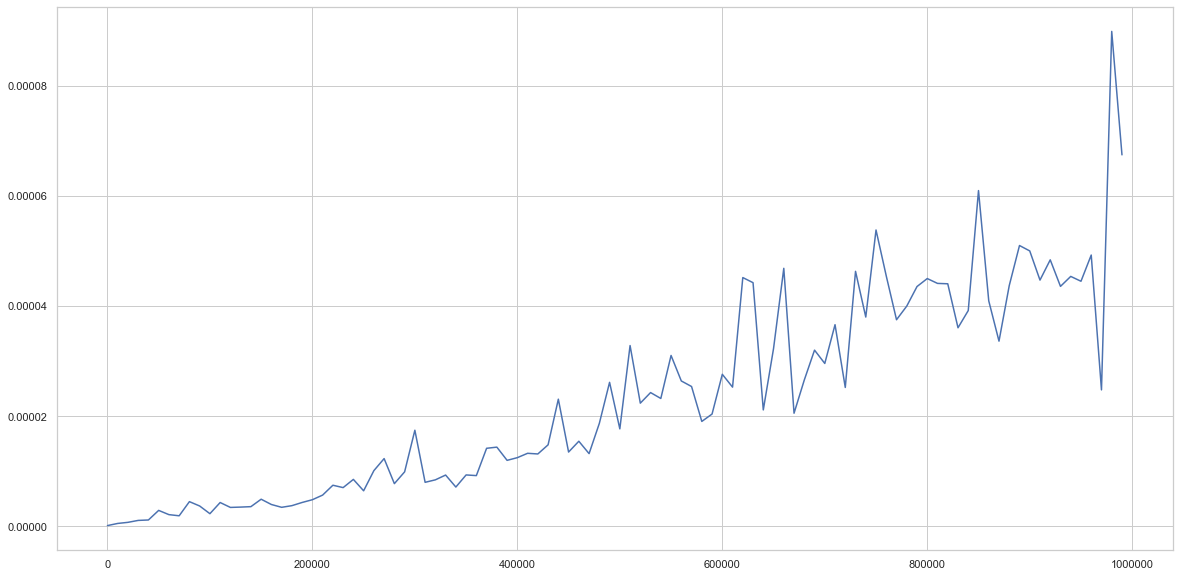

In [97]:
y = [delete_time[el] for el in x]
plt.plot(x, y)
pass

# Red-Black tree

In [98]:
insert_time, search_time, delete_time, _ = evaluate(trees.RBTreeInt(), unique_num_set)

Insert, Mean : 0.000323 ms.,  Max 0.412360 ms.
Search, Mean : 0.001030 ms.,  Max 0.281760 ms.
Delete, Mean : 0.001488 ms.,  Max 0.904670 ms.
Total time 60.350993, sec


### Insertion

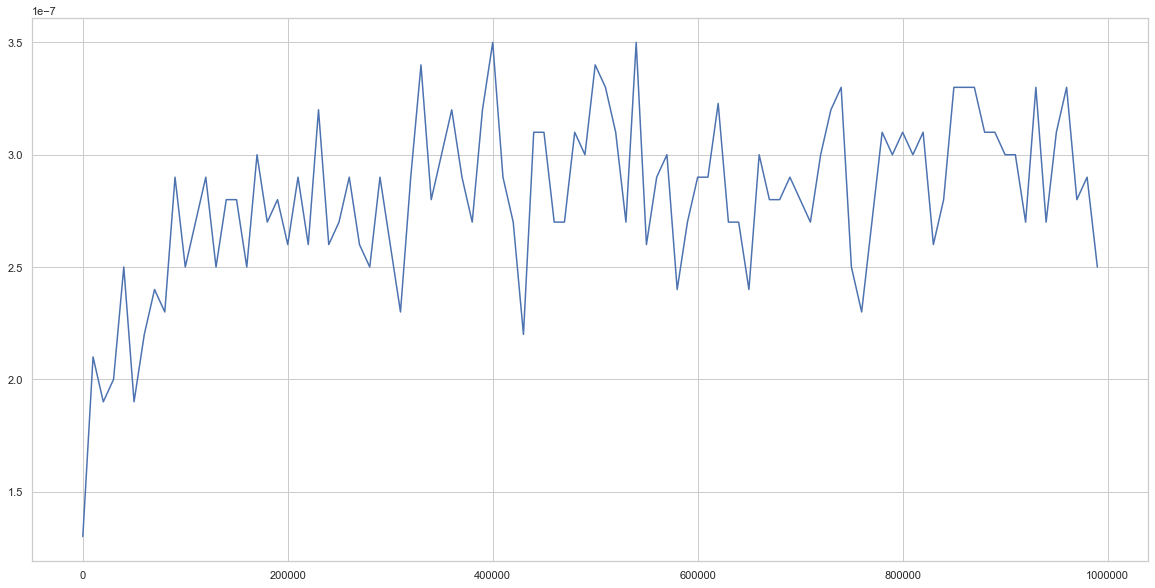

In [99]:
y = [insert_time[el] for el in x]
plt.plot(x, y)
pass

### Searching

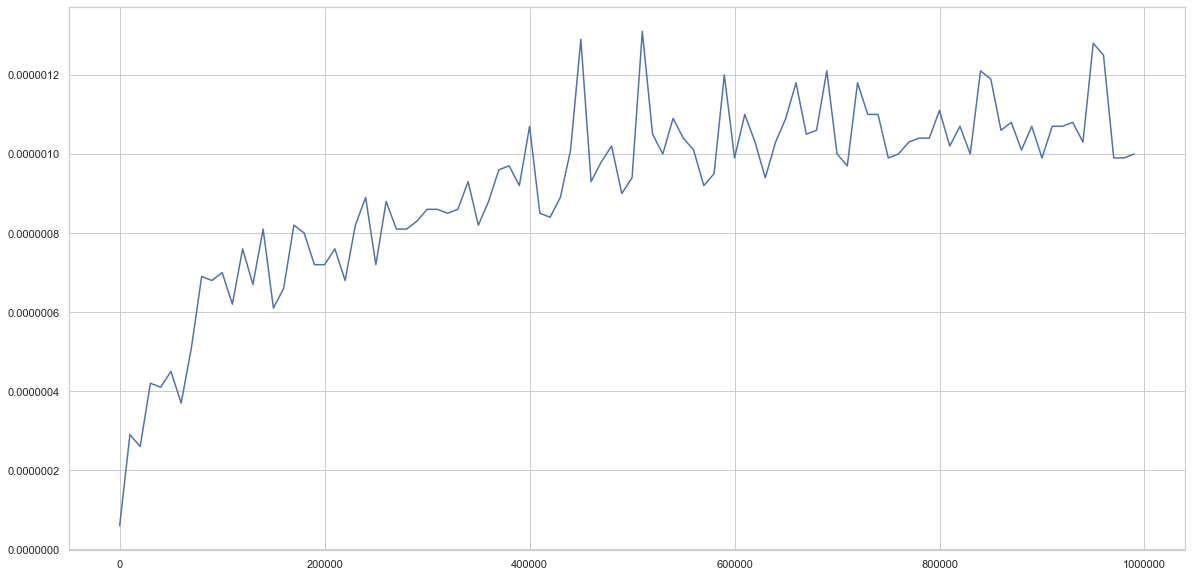

In [100]:
y = [search_time[el] for el in x]
plt.plot(x, y)
pass

### Deletion

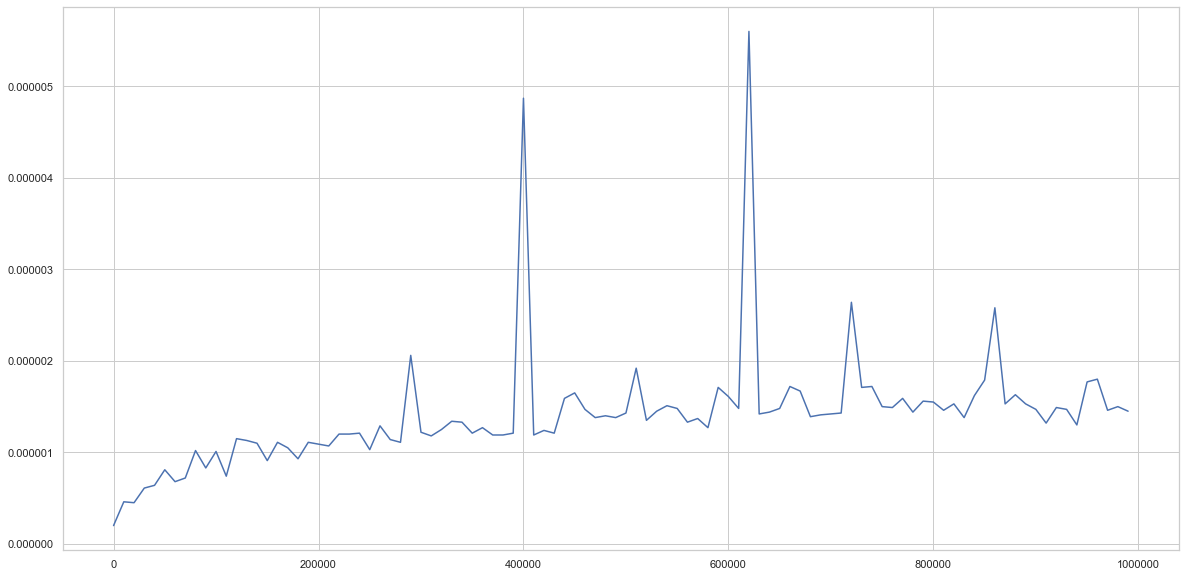

In [101]:
y = [delete_time[el] for el in x]
plt.plot(x, y)
pass

# Sorted array

In [ ]:
insert_time, search_time, delete_time, _ = evaluate(trees.SortedArrInt(), unique_num_set)

### Insertion

In [ ]:
y = [insert_time[el] for el in x]
plt.plot(x, y)
pass

### Searching

In [ ]:
y = [search_time[el] for el in x]
plt.plot(x, y)
pass

### Deletion

In [ ]:
y = [delete_time[el] for el in x]
plt.plot(x, y)
pass